In [ ]:
# Download and unzip annotations
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip
!rm annotations_trainval2017.zip
!mkdir COCOdataset2017
!mv annotations COCOdataset2017/


--2023-02-21 11:30:38--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.176.27, 3.5.9.108, 54.231.194.9, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.176.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  85.5MB/s    in 2.8s    

2023-02-21 11:30:41 (85.5 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [ ]:


!pip install pycocotools>=2.0.1


In [ ]:
from pycocotools.coco import COCO
from tqdm import tqdm_notebook
import urllib.request
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)


In [ ]:
# Initialize COCO api for instance annotations
# COCO take the .json annotation file as input
coco = COCO('COCOdataset2017/annotations/instances_train2017.json')

loading annotations into memory...
Done (t=16.98s)
creating index...
index created!


In [ ]:
# Get all categories
cats = coco.loadCats(coco.getCatIds())

# Print categories
nms=[cat['name'] for cat in cats]
print(f"{len(cats)} categories: \n{', '.join(nms)}")

80 categories: 
person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, broccoli, carrot, hot dog, pizza, donut, cake, chair, couch, potted plant, bed, dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush


In [ ]:
# Specify classes to download
catIds = coco.getCatIds(catNms=['person', 'car', 'bicycle'])

# Get images ids
imgIds = coco.getImgIds(catIds=catIds)

# Load images
images = coco.loadImgs(imgIds)

print(len(imgIds))
print("imgIds: ", imgIds[0])
print("images: ", images[0])


1101
imgIds:  247808
images:  {'license': 3, 'file_name': '000000247808.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000247808.jpg', 'height': 640, 'width': 378, 'date_captured': '2013-11-23 05:08:51', 'flickr_url': 'http://farm1.staticflickr.com/199/485431395_f55e8bb06d_z.jpg', 'id': 247808}


In [ ]:
!wget http://images.cocodataset.org/zips/train2017.zip

--2023-02-21 11:40:20--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.139.169, 3.5.16.216, 52.216.228.168, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.139.169|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  86.9MB/s    in 5m 14s  

2023-02-21 11:45:34 (58.8 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [ ]:
%%capture
!unzip train2017.zip

In [ ]:
!ls train2017

Streaming output truncated to the last 5000 lines.
000000120642.jpg  000000267048.jpg  000000411215.jpg  000000557783.jpg
000000120643.jpg  000000267049.jpg  000000411223.jpg  000000557785.jpg
000000120644.jpg  000000267055.jpg  000000411225.jpg  000000557794.jpg
000000120645.jpg  000000267059.jpg  000000411226.jpg  000000557804.jpg
000000120648.jpg  000000267064.jpg  000000411238.jpg  000000557811.jpg
000000120655.jpg  000000267067.jpg  000000411241.jpg  000000557812.jpg
000000120666.jpg  000000267068.jpg  000000411243.jpg  000000557819.jpg
000000120670.jpg  000000267076.jpg  000000411247.jpg  000000557823.jpg
000000120674.jpg  000000267082.jpg  000000411253.jpg  000000557824.jpg
000000120676.jpg  000000267088.jpg  000000411257.jpg  000000557825.jpg
000000120682.jpg  000000267095.jpg  000000411261.jpg  000000557829.jpg
000000120683.jpg  000000267105.jpg  000000411263.jpg  000000557830.jpg
000000120697.jpg  000000267106.jpg  000000411266.jpg  000000557832.jpg
000000120703.jpg  00000026

In [ ]:
im_folder = 'train2017/'

# Download images
for im in tqdm_notebook(images):
    im_path = im_folder + im['file_name']
    if not os.path.exists(im_path):
        urllib.request.urlretrieve(im['coco_url'], im_path)

<ipython-input-12-bbf39f88ccf9>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for im in tqdm_notebook(images):


  0%|          | 0/1101 [00:00<?, ?it/s]

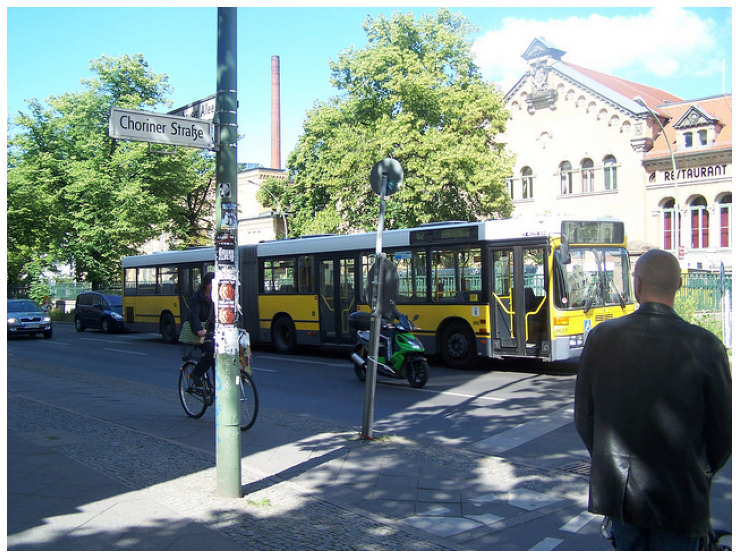

In [ ]:
# Display a random image
img = images[np.random.randint(0, len(imgIds))]
im = cv2.imread(im_folder + img['file_name'])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im), plt.axis('off');


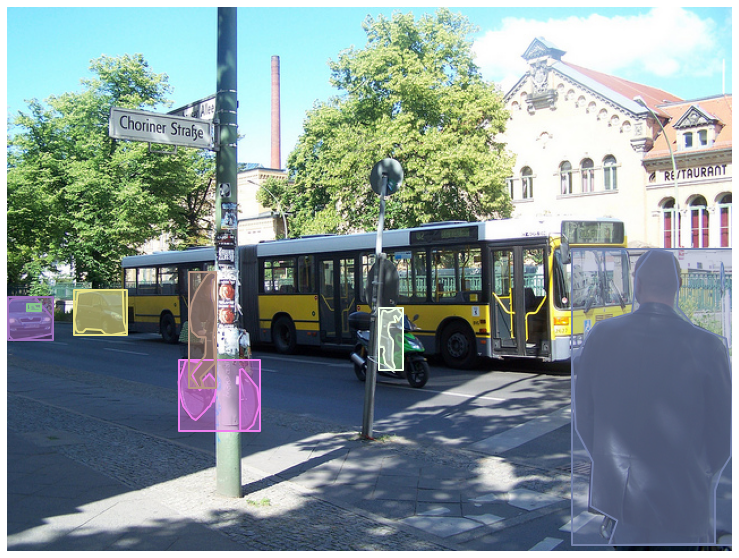

In [ ]:
# Load and display instance annotations
plt.imshow(im); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)


In [ ]:
# Show bbox labels
[{nms[annot['category_id'] - 1]: annot['bbox']} for annot in anns]

[{'bicycle': [150.82, 311.22, 71.52, 62.17]},
 {'car': [0.0, 255.58, 40.08, 38.0]},
 {'car': [58.67, 248.95, 46.48, 39.98]},
 {'person': [498.34, 213.39, 141.66, 261.04]},
 {'person': [160.14, 233.44, 24.04, 101.89]},
 {'person': [327.74, 264.9, 21.1, 55.36]},
 {'person': [16.83, 261.96, 12.36, 5.84]}]

In [ ]:


anns[0]



Image Classification with Xception

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
import numpy as np

In [ ]:
import PIL
from PIL import Image
import requests
from io import BytesIO

In [ ]:
 
# load the model
model = Xception(weights='imagenet', include_top=True)
 

In [ ]:
# chose the URL image that you want
#URL = "https://images.unsplash.com/photo-1529429617124-95b109e86bb8?ixlib=rb-1.2.1&amp;ixid=eyJhcHBfaWQiOjEyMDd9&amp;auto=format&amp;fit=crop&amp;w=500&amp;q=60"
#URL1 ="https://unsplash.com/photos/qcRMfoIWxRo"
cd = "https://images.unsplash.com/photo-1545074116-ba9228a4183c?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=387&q=80"
#ur ="https://images.unsplash.com/photo-1535242208474-9a2793260ca8?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=464&q=80"

In [ ]:
# get the image
response = requests.get(cd)
img = Image.open(BytesIO(response.content))
# resize the image according to each model (see documentation of each model)
img = img.resize((299,299))
 

In [ ]:
##############################################
# if you want to read the image from your PC 
#############################################
# img_path = 'myimage.jpg'
# img = image.load_img(img_path, target_size=(299, 299))
#############################################

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
#pip install tensorflow
import tensorflow as tf


In [ ]:
#from tf.keras.utils import img_to_array
# convert to numpy array
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

1/1 [==============================] - 0s 392ms/step


In [ ]:
import keras;
print(keras.__version__)

2.11.0


In [ ]:
# return the top 20 detected objects
label = decode_predictions(features, top=20)
label

[[('n03991062', 'pot', 0.30368382),
  ('n04522168', 'vase', 0.13680741),
  ('n07930864', 'cup', 0.10499512),
  ('n03017168', 'chime', 0.043387156),
  ('n04553703', 'washbasin', 0.017421598),
  ('n03443371', 'goblet', 0.011936772),
  ('n07760859', 'custard_apple', 0.008881562),
  ('n04258138', 'solar_dish', 0.008231651),
  ('n03223299', 'doormat', 0.007188267),
  ('n04476259', 'tray', 0.007142059),
  ('n07753113', 'fig', 0.0070357877),
  ('n03786901', 'mortar', 0.0063475342),
  ('n03063599', 'coffee_mug', 0.006254424),
  ('n12768682', 'buckeye', 0.0061417464),
  ('n03775546', 'mixing_bowl', 0.006033905),
  ('n07892512', 'red_wine', 0.005953496),
  ('n03929660', 'pick', 0.0058536795),
  ('n03637318', 'lampshade', 0.005620482),
  ('n02231487', 'walking_stick', 0.0049436595),
  ('n07749582', 'lemon', 0.00456217)]]

In [ ]:
[tpl[1:3] for tpl in label[0] if tpl[2]>0.05]



[('pot', 0.30368382), ('vase', 0.13680741), ('cup', 0.10499512)]